In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy, LookaheadRolloutStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap

In [12]:
full_risk_map = initializeFullRiskMap()
team_names = ["blue", "red"]
team_strategies = [RuleOfThumbStrategy, LookaheadRolloutStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
pos = {}

pos['Alaska'] = (1,7)
pos['North West Territory'] = (2,7)
pos['Greenland'] = (3,7)
pos['Iceland'] = (4,7)
pos['Scandinavia'] = (5,7)
pos['Alberta'] = (1,6)
pos['Ontario'] = (2,6)
pos['Quebec'] = (3,6)
pos['Great Britain'] = (4,6)
pos['Northern Europe'] = (5,6)
pos['Ukraine'] = (6,6)
pos['Ural'] = (7,6)
pos['Siberia'] = (8,6)
pos['Irkutsk'] = (9,6)
pos['Japan'] = (10,6)
pos['Yakutsk'] = (9,7)
pos['Kamchatka'] = (10,7)
pos['Western United States'] = (1,5)
pos['Eastern United States'] = (2,5)
pos['Western Europe'] = (4,5)
pos['Southern Europe'] = (5,5)
pos['Afghanistan'] = (7,5)
pos['China'] = (8,5)
pos['Mongolia'] = (9,5)
pos['Central America'] = (1,4)
pos['Middle East'] = (7, 4)
pos['India'] = (8,4)
pos['Siam'] = (9,4)
pos['Venezuela'] = (1,3)
pos['Brazil'] = (2,3)
pos['North Africa'] = (4,4)
pos['Egypt'] = (5,4)
pos['Congo'] = (4,3)
pos['East Africa'] = (5,3)
pos['Peru'] = (1,2)
pos['Argentina'] = (2,2)
pos['South Africa'] = (4,2)
pos['Madagascar'] = (5,2)
pos['Indonesia'] = (9,3)
pos['New Guinea'] = (10,3)
pos['Western Australia'] = (9,2)
pos['Eastern Australia'] = (10,2)

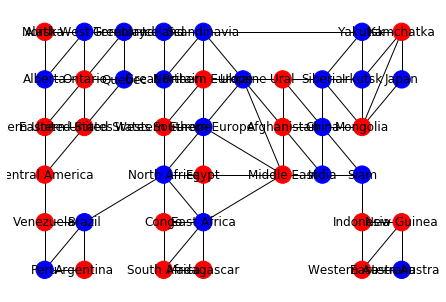

In [5]:
color_map = risk_map.getTeamColorMap()
nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)

In [6]:
teams[0].addTroops('Ural', -3)

teams[0].getNextMove(depth_ = 1, print_ = True)

Exception: Resulting number of troops cannot be negative

In [ ]:
raise Error

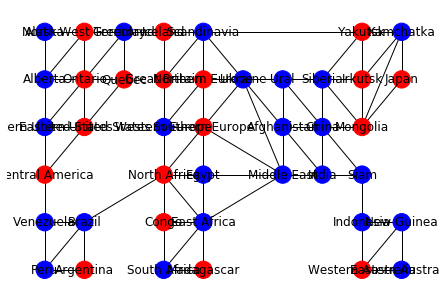

Adding 1 officially to North Africa!
Attack:  ('North Africa', 'Brazil')
Team red declares attack on Team blue from North Africa to Brazil
Attacking_dice:  [5, 2, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Attack:  ('Brazil', 'Peru')
Team red declares attack on Team blue from Brazil to Peru
Attacking_dice:  [6, 3, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  5
Defending Troops Left:  1
Attacking_dice:  [5, 2, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Peru', 'Venezuela')
Team red declares attack on Team blue from Peru to Venezuela
Attacking_dice:  [5, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0


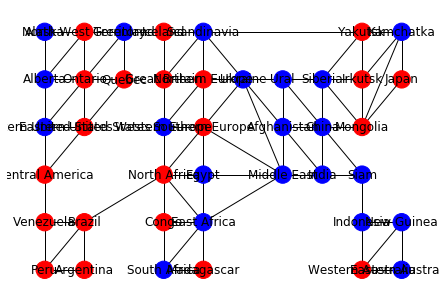

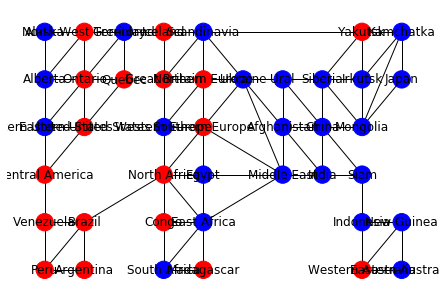

Adding 1 officially to Eastern United States!
Attack:  ('Eastern United States', 'Western United States')
Team red declares attack on Team blue from Eastern United States to Western United States
Attacking_dice:  [4, 2, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Western United States', 'Alberta')
Team red declares attack on Team blue from Western United States to Alberta
Attacking_dice:  [4, 3, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  4
Defending Troops Left:  1
Attacking_dice:  [6, 4, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Alberta', 'Alaska')
Team red declares attack on Team blue from Alberta to Alaska
Attacking_dice:  [4, 2]
Defending_dice:  [4]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [4]
Defending_dice:  [4]
[False]
Att

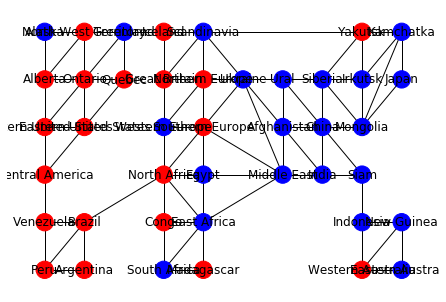

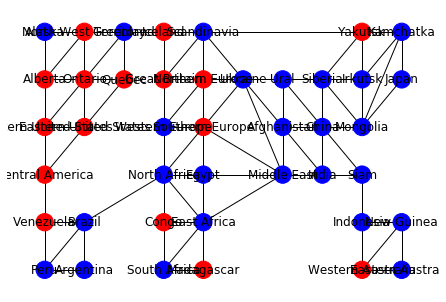

Adding 1 officially to Western Australia!
Attack:  ('Western Australia', 'Indonesia')
Team red declares attack on Team blue from Western Australia to Indonesia
Attacking_dice:  [6, 5, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Indonesia', 'Siam')
Team red declares attack on Team blue from Indonesia to Siam
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Venezuela', 'Brazil')
Team red declares attack on Team blue from Venezuela to Brazil
Attacking_dice:  [3, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Attack:  ('Brazil', 'North Africa')
Team red declares attack on Team blue from Brazil to North Africa
Attacking_dice:  [2]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
Attack:  ('Siam', 'China')
Team red declares attack on Team blue from Siam to China
Attacking_dice:  [6, 3, 1]
Defending_dice: 

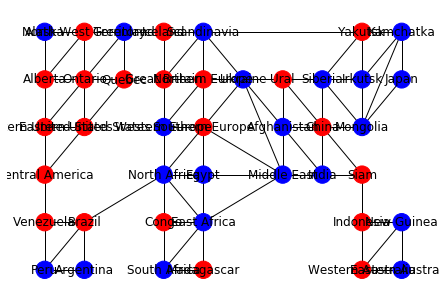

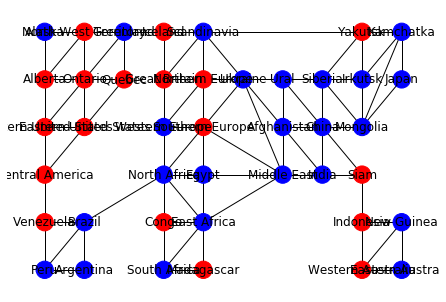

Adding 1 officially to Siam!
Attack:  ('Siam', 'China')
Team red declares attack on Team blue from Siam to China
Attacking_dice:  [6, 2, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Attack:  ('China', 'India')
Team red declares attack on Team blue from China to India
Attacking_dice:  [6, 4, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('India', 'Middle East')
Team red declares attack on Team blue from India to Middle East
Attacking_dice:  [6, 5, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Middle East', 'Egypt')
Team red declares attack on Team blue from Middle East to Egypt
Attacking_dice:  [5, 4, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Egypt', 'North Africa')
Team red declares attack on Team blue from Egypt to North Africa
Attacking_dice:  [5, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Lef

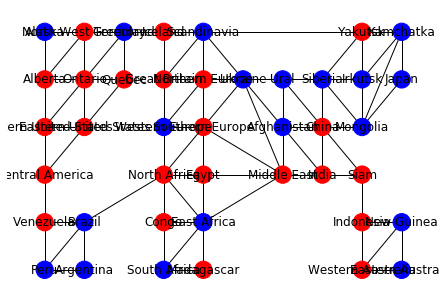

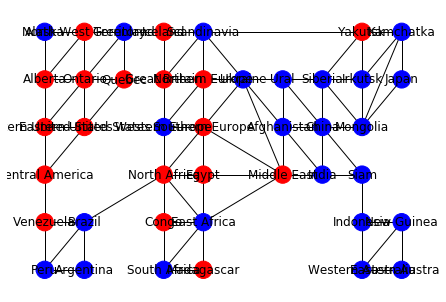

Adding 1 officially to Alberta!
Attack:  ('Alberta', 'Alaska')
Team red declares attack on Team blue from Alberta to Alaska
Attacking_dice:  [6, 4, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Attack:  ('Alaska', 'Kamchatka')
Team red declares attack on Team blue from Alaska to Kamchatka
Attacking_dice:  [5, 4, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Kamchatka', 'Mongolia')
Team red declares attack on Team blue from Kamchatka to Mongolia
Attacking_dice:  [5, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Mongolia', 'China')
Team red declares attack on Team blue from Mongolia to China
Attacking_dice:  [3, 2, 1]
Defending_dice:  [3]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [5, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Attack:  ('China', 'Siam')
Team red declares attack

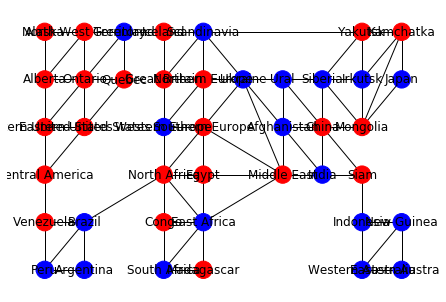

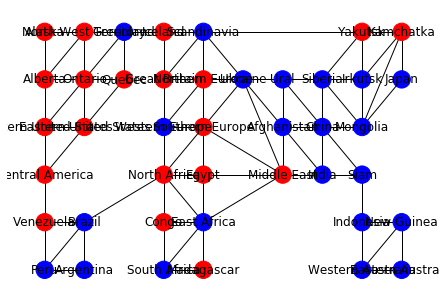

Adding 1 officially to Northern Europe!
Attack:  ('Northern Europe', 'Scandinavia')
Team red declares attack on Team blue from Northern Europe to Scandinavia
Attacking_dice:  [3, 2, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [5, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Scandinavia', 'Ukraine')
Team red declares attack on Team blue from Scandinavia to Ukraine
Attacking_dice:  [5, 2, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Ukraine', 'Ural')
Team red declares attack on Team blue from Ukraine to Ural
Attacking_dice:  [6, 4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Ural', 'Siberia')
Team red declares attack on Team blue from Ural to Siberia
Attacking_dice:  [5, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [4]
Defend

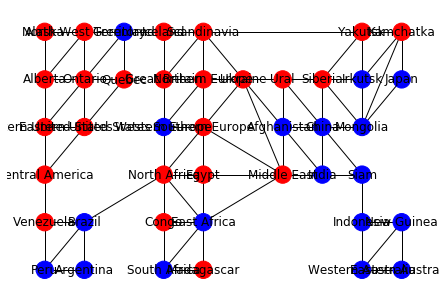

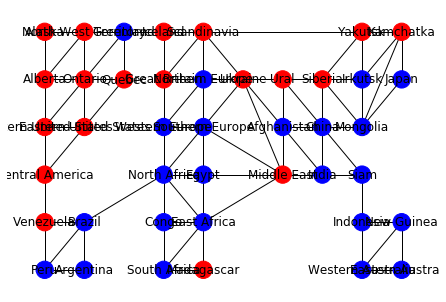

Adding 1 officially to Great Britain!
Attack:  ('Great Britain', 'Northern Europe')
Team red declares attack on Team blue from Great Britain to Northern Europe
Attacking_dice:  [5, 4, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Attack:  ('Northern Europe', 'Southern Europe')
Team red declares attack on Team blue from Northern Europe to Southern Europe
Attacking_dice:  [5, 4, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Southern Europe', 'Egypt')
Team red declares attack on Team blue from Southern Europe to Egypt
Attacking_dice:  [6, 5, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Egypt', 'North Africa')
Team red declares attack on Team blue from Egypt to North Africa
Attacking_dice:  [5, 4, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('North Africa', 'Western Europe')
Team red declares attack on Team

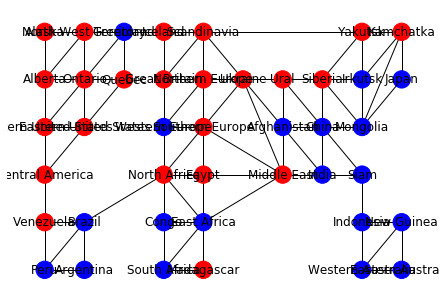

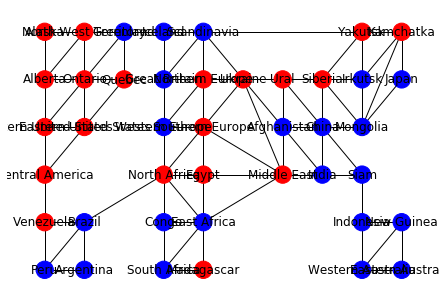

Adding 1 officially to North West Territory!
Attack:  ('North West Territory', 'Greenland')
Team red declares attack on Team blue from North West Territory to Greenland
Attacking_dice:  [5, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
Attack:  ('Greenland', 'Iceland')
Team red declares attack on Team blue from Greenland to Iceland
Attacking_dice:  [5, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Iceland', 'Great Britain')
Team red declares attack on Team blue from Iceland to Great Britain
Attacking_dice:  [4, 3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  4
Defending Troops Left:  1
Attacking_dice:  [6, 4, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [6, 5]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [3]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troo

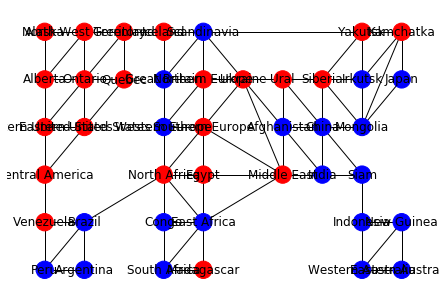

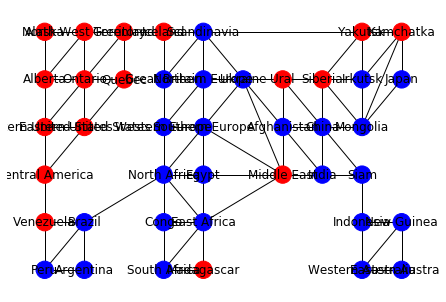

Adding 1 officially to Venezuela!
Attack:  ('Venezuela', 'Peru')
Team red declares attack on Team blue from Venezuela to Peru
Attacking_dice:  [4, 2, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('Peru', 'Brazil')
Team red declares attack on Team blue from Peru to Brazil
Attacking_dice:  [4, 2, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  4
Defending Troops Left:  1
Attacking_dice:  [4, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Brazil', 'North Africa')
Team red declares attack on Team blue from Brazil to North Africa
Attacking_dice:  [3, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [5]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


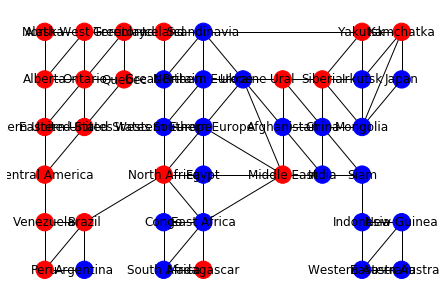

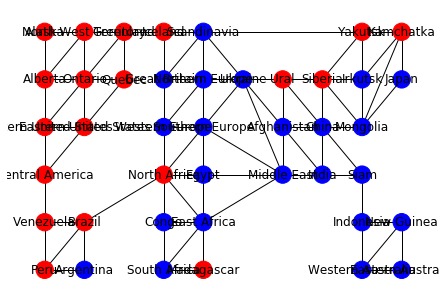

Adding 1 officially to Yakutsk!
Attack:  ('Yakutsk', 'Irkutsk')
Team red declares attack on Team blue from Yakutsk to Irkutsk
Attacking_dice:  [6, 5, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [6, 5, 3]
Defending_dice:  [6]
[False]
Attacking Troops Left:  5
Defending Troops Left:  1
Attacking_dice:  [4, 2, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  4
Defending Troops Left:  1
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Irkutsk', 'Mongolia')
Team red declares attack on Team blue from Irkutsk to Mongolia
Attacking_dice:  [4, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [3]
Defending_dice:  [3]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1


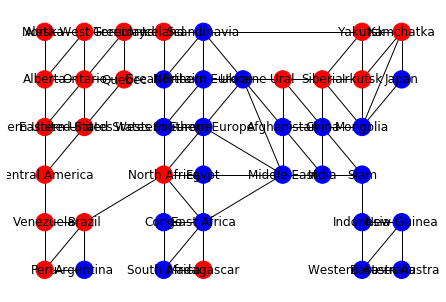

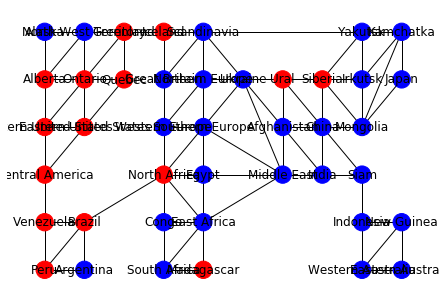

Adding 1 officially to Madagascar!
Attack:  ('Madagascar', 'East Africa')
Team red declares attack on Team blue from Madagascar to East Africa
Attacking_dice:  [5, 4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
Attack:  ('East Africa', 'Egypt')
Team red declares attack on Team blue from East Africa to Egypt
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  4
Defending Troops Left:  1
Attacking_dice:  [5, 2, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Egypt', 'Southern Europe')
Team red declares attack on Team blue from Egypt to Southern Europe
Attacking_dice:  [4, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


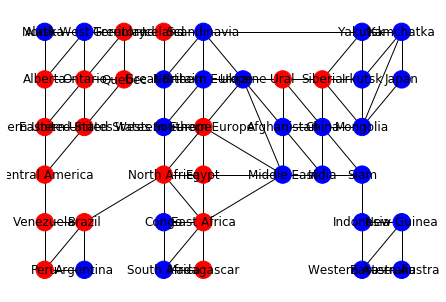

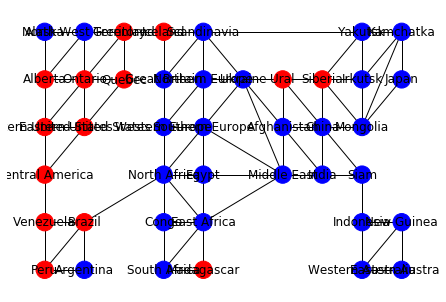

Adding 1 officially to Ural!
Attack:  ('Ural', 'Afghanistan')
Team red declares attack on Team blue from Ural to Afghanistan
Attacking_dice:  [5, 3, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('Afghanistan', 'China')
Team red declares attack on Team blue from Afghanistan to China
Attacking_dice:  [6, 4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('China', 'Mongolia')
Team red declares attack on Team blue from China to Mongolia
Attacking_dice:  [3, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


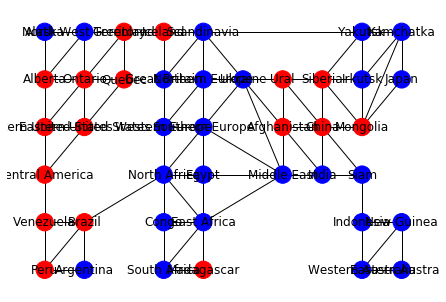

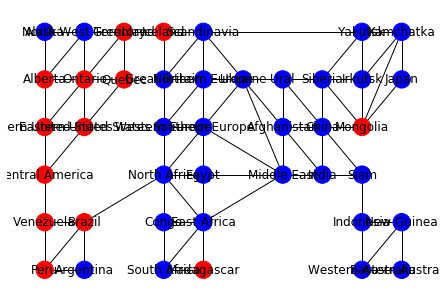

Adding 1 officially to Ontario!
Attack:  ('Ontario', 'North West Territory')
Team red declares attack on Team blue from Ontario to North West Territory
Attacking_dice:  [6, 2, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
Attack:  ('North West Territory', 'Alaska')
Team red declares attack on Team blue from North West Territory to Alaska
Attacking_dice:  [6, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Alaska', 'Kamchatka')
Team red declares attack on Team blue from Alaska to Kamchatka
Attacking_dice:  [6, 4]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Attack:  ('Kamchatka', 'Japan')
Team red declares attack on Team blue from Kamchatka to Japan
Attacking_dice:  [3]
Defending_dice:  [6]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1


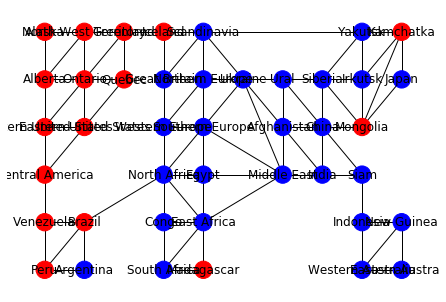

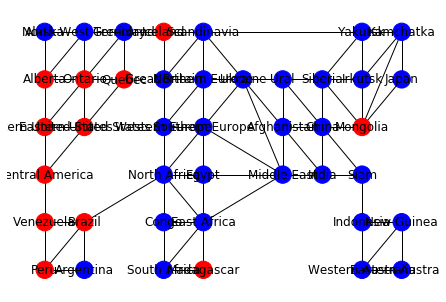

Adding 1 officially to Eastern United States!


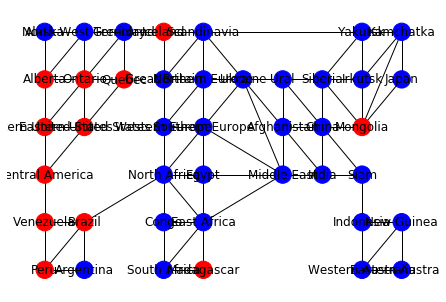

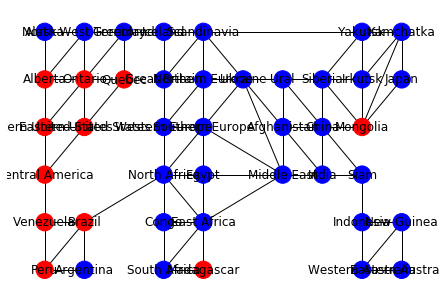

Adding 1 officially to Brazil!
Attack:  ('Brazil', 'North Africa')
Team red declares attack on Team blue from Brazil to North Africa
Attacking_dice:  [5, 4, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('North Africa', 'Western Europe')
Team red declares attack on Team blue from North Africa to Western Europe
Attacking_dice:  [4, 2]
Defending_dice:  [4]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [6]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


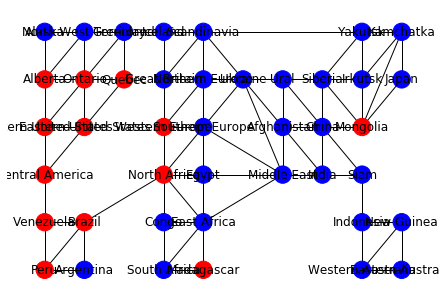

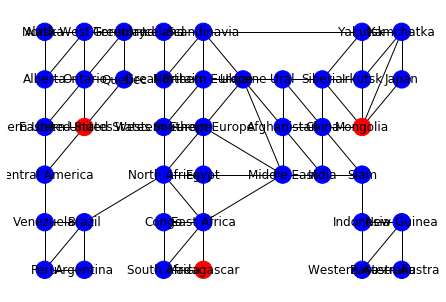

Adding 1 officially to Mongolia!
Attack:  ('Mongolia', 'Siberia')
Team red declares attack on Team blue from Mongolia to Siberia
Attacking_dice:  [5, 4, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Eastern United States', 'Quebec')
Team red declares attack on Team blue from Eastern United States to Quebec
Attacking_dice:  [4, 3, 1]
Defending_dice:  [5, 1]
[False  True]
Attacking Troops Left:  4
Defending Troops Left:  2
Attacking_dice:  [6, 4, 2]
Defending_dice:  [6, 4]
[False False]
Attacking Troops Left:  2
Defending Troops Left:  2
Attacking_dice:  [5]
Defending_dice:  [4, 1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [6]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
Attack:  ('Siberia', 'Irkutsk')
Team red declares attack on Team blue from Siberia to Irkutsk
Attacking_dice:  [4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Att

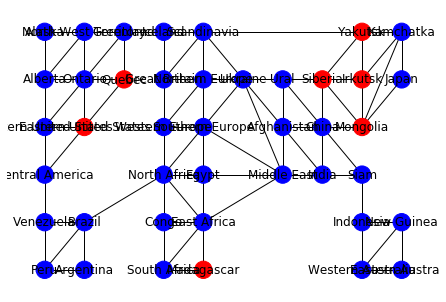

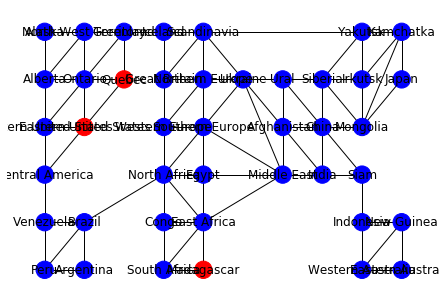

Adding 1 officially to Quebec!
Attack:  ('Quebec', 'Greenland')
Team red declares attack on Team blue from Quebec to Greenland
Attacking_dice:  [5, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('Greenland', 'North West Territory')
Team red declares attack on Team blue from Greenland to North West Territory
Attacking_dice:  [6, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
Attack:  ('North West Territory', 'Alaska')
Team red declares attack on Team blue from North West Territory to Alaska
Attacking_dice:  [5]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


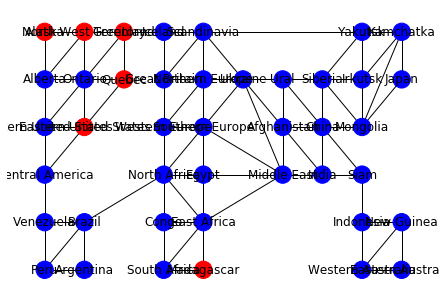

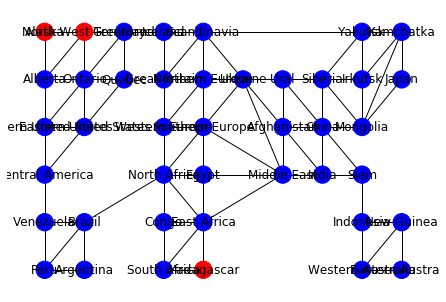

Adding 1 officially to Alaska!
Attack:  ('Alaska', 'Alberta')
Team red declares attack on Team blue from Alaska to Alberta
Attacking_dice:  [5, 3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [6, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [4]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1


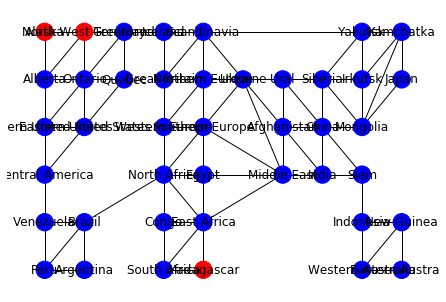

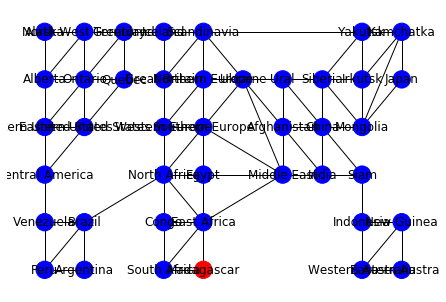

Adding 1 officially to Madagascar!
Attack:  ('Madagascar', 'East Africa')
Team red declares attack on Team blue from Madagascar to East Africa
Attacking_dice:  [6, 3, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
Attack:  ('East Africa', 'North Africa')
Team red declares attack on Team blue from East Africa to North Africa
Attacking_dice:  [3, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [4]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


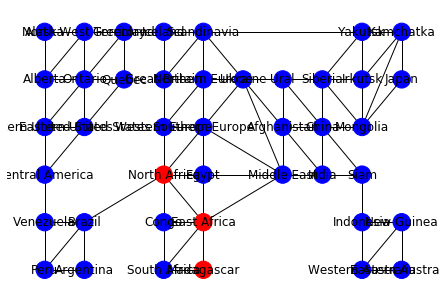

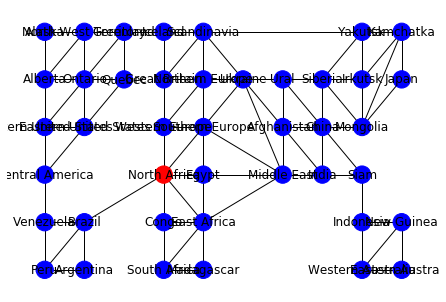

Adding 1 officially to North Africa!
Attack:  ('North Africa', 'Brazil')
Team red declares attack on Team blue from North Africa to Brazil
Attacking_dice:  [4, 3, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [4, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [6]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


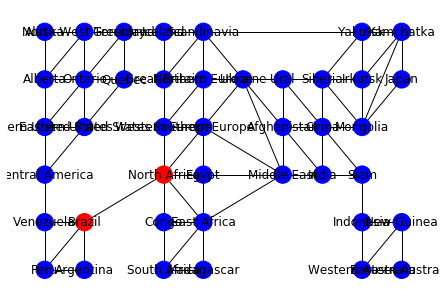

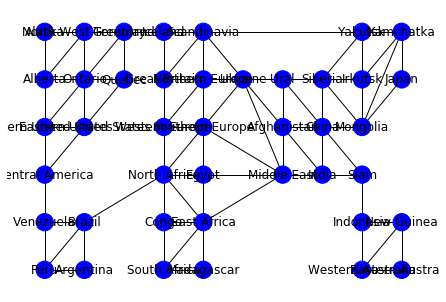

blue team has won in 20 turns


In [13]:
curr_team = teams[0]
defending_team = teams[1]
counter = 0
while defending_team.hasTeamWon() == False:
    curr_team.playTurn(depth_ = 4)
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, pos = pos, with_labels=True)
    plt.show()
    counter += 1
    
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    